In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import pandas as pd
from train_simulator import Operator, Controller, Train, Kalman

### Create run curve

In [2]:
%%time
operator = Operator(dt=1, L=10000)
run_curve = operator.shortest_path()
print len(run_curve)

205
CPU times: user 145 ms, sys: 11.8 ms, total: 157 ms
Wall time: 150 ms


### Controller adustment

In [3]:
controller = Controller()
controller.set_params([1, 0, 0])
controller.set_run_curve(run_curve)
train, err = controller.run()
print train.t
print err

211.7
1.35848613226


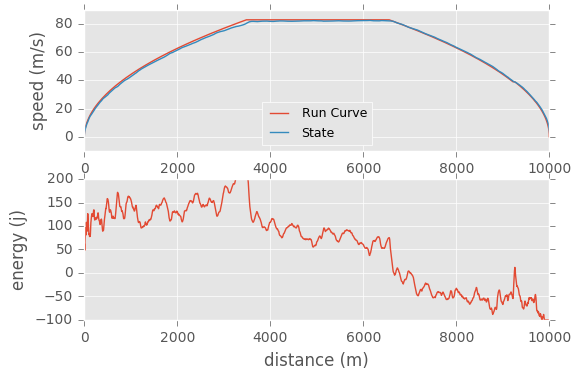

In [4]:
rc = np.array([[r, v] for r, v in run_curve]).T
x = np.array(train.x).T

plt.subplot(211)
plt.plot(rc[0], rc[1], label='Run Curve')
plt.plot(x[0], x[1], label='State')
plt.legend(loc='best', fontsize=9)
plt.xlim([0, 1e4])
plt.ylabel('speed (m/s)')

plt.subplot(212)
plt.plot(x[0,1:], train.energy)
plt.xlim([0, 1e4]);
plt.ylabel('energy (j)')
plt.xlabel('distance (m)');

In [12]:
print controller.param_search()
train, err = controller.run()
print train.t
print err

[ 3.72060145 -0.06317865  0.64504848]
204.0
0.0350234862855


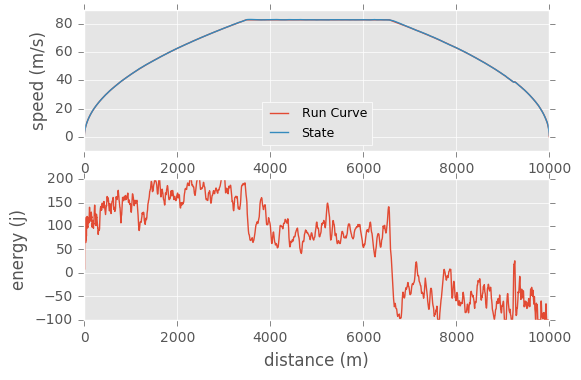

In [13]:
x = np.array(train.x).T

plt.subplot(211)
plt.plot(rc[0], rc[1], label='Run Curve')
plt.plot(x[0], x[1], label='State')
plt.legend(loc='best', fontsize=9)
plt.xlim([0, 1e4])
plt.ylabel('speed (m/s)')

plt.subplot(212)
plt.plot(x[0,1:], train.energy)
plt.xlim([0, 1e4]);
plt.ylabel('energy (j)')
plt.xlabel('distance (m)');

### Put it all together

In [14]:
noise = 3.0
n = 3
x0 = np.zeros(2)
P0 = np.diag([1, 0.01])

train = Train(sensor_noise=noise, num_sensor=n)
kalman = Kalman(x0, P0, state_noise=0.3, sensor_noise=noise, num_sensor=n)
train, err = controller.run(train=train, filter=kalman)
print train.t
print err

205.3
0.00938981030852


MSE Kalman:	 0.892 / 0.202


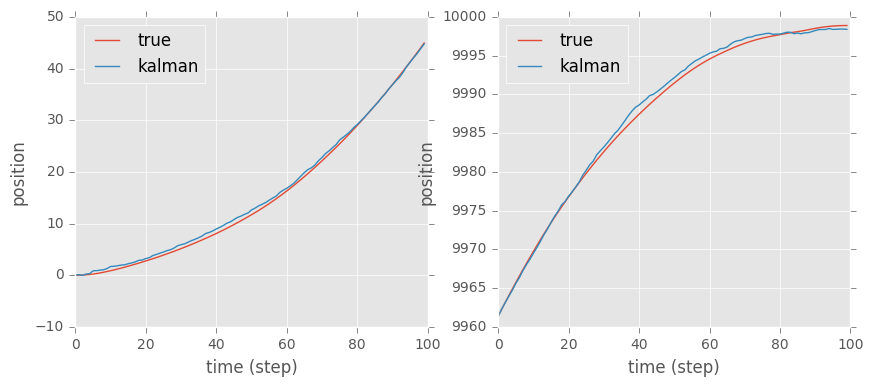

In [15]:
x_true = np.array(train.x)
x_kalman = np.array(kalman.x)
mse_kalman = train.eval(x_kalman)
print "MSE Kalman:\t %.3f / %.3f" %(mse_kalman[0], mse_kalman[1])

T = 100
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(range(T), x_true[:T, 0], label='true')
plt.plot(range(T), x_kalman[:T, 0], label='kalman')
plt.legend(loc='best')
plt.xlabel('time (step)')
plt.ylabel('position');

plt.subplot(122)
plt.plot(range(T), x_true[-T:, 0], label='true')
plt.plot(range(T), x_kalman[-T:, 0], label='kalman')
plt.legend(loc='best')
plt.xlabel('time (step)')
plt.ylabel('position');

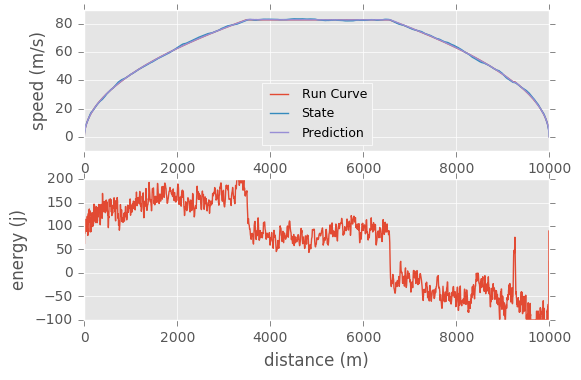

In [16]:
x = np.array(train.x).T
x_ = np.array(kalman.x).T

plt.subplot(211)
plt.plot(rc[0], rc[1], label='Run Curve')
plt.plot(x[0], x[1], label='State')
plt.plot(x_[0], x_[1], label='Prediction');
plt.legend(loc='best', fontsize=9)
plt.xlim([0, 1e4])
plt.ylabel('speed (m/s)')

plt.subplot(212)
plt.plot(x[0,1:], train.energy)
plt.xlim([0, 1e4]);
plt.ylabel('energy (j)')
plt.xlabel('distance (m)');